# Importing Libraries

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# Importing Data

In [2]:
data = pd.read_csv("shopping_trends.csv")
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# Checking Data

In [3]:
data.shape

(3900, 19)

In [4]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [7]:
data.duplicated().sum()

0

# EDA

In [8]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

# Age Distribution

In [9]:
data["Age"].value_counts(ascending=False)

69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64

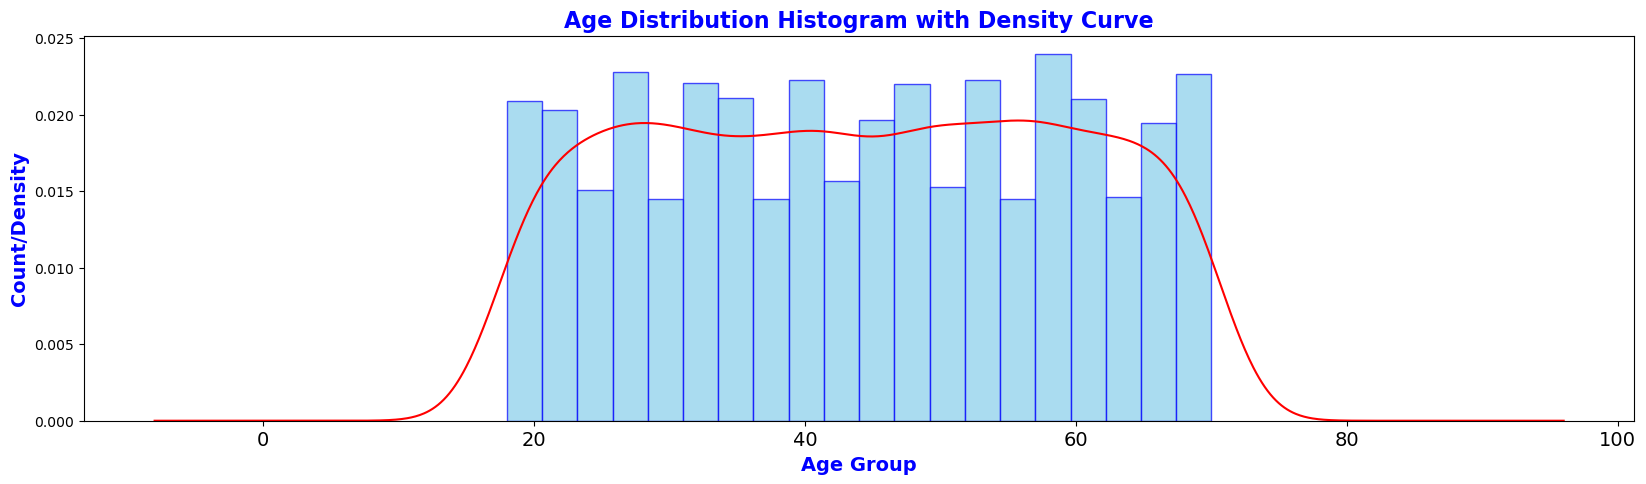

In [10]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(data["Age"], bins = 20 , edgecolor = 'blue', color = "skyblue", alpha = 0.7,density = True)
data["Age"].plot(kind = 'kde', color = 'red', ax= ax)

ax.set_title("Age Distribution Histogram with Density Curve",color = 'blue', fontweight = 'bold',fontsize=16)
ax.set_ylabel("Count/Density",color = 'blue', fontweight = 'bold',fontsize=14)
ax.set_xlabel("Age Group",color = 'blue', fontweight = 'bold',fontsize=14)

plt.xticks(fontsize = 14)

plt.show()

# Relation between Age and Gender

<Figure size 3500x500 with 0 Axes>

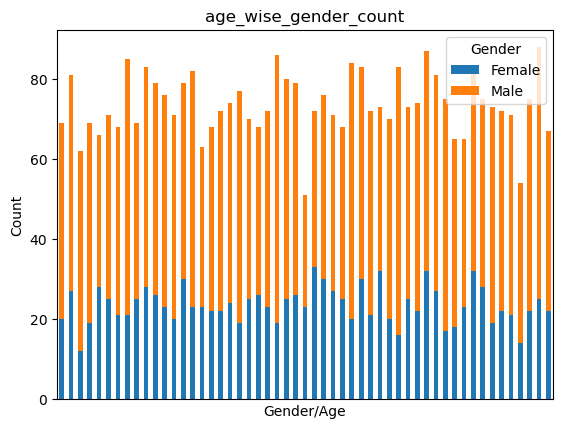

In [11]:
age_wise_gender_count = data.groupby(["Age","Gender"]).size().unstack()

plt.figure(figsize=(35,5))

age_wise_gender_count.plot(kind = 'bar',stacked = True, rot = 45)
plt.title('age_wise_gender_count')
plt.xlabel('Gender/Age')
plt.ylabel('Count')
plt.xticks([])


plt.show()

# Gender Ratio

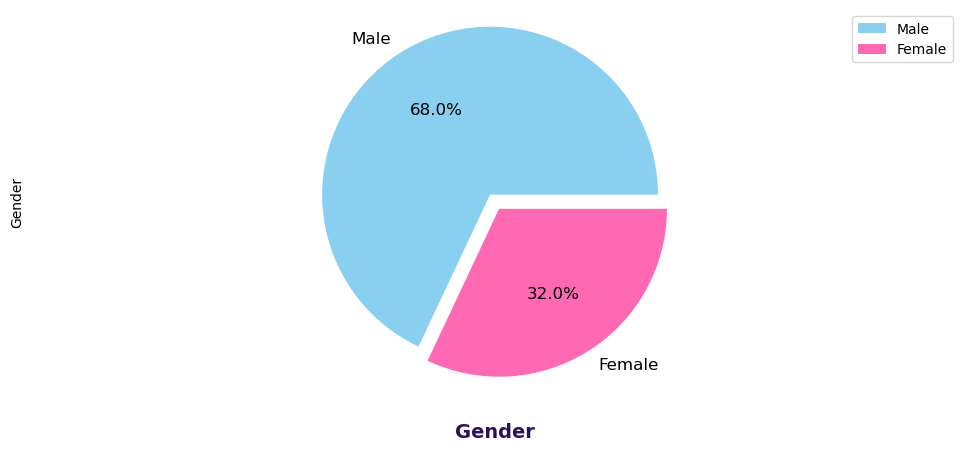

In [12]:
plt.figure(figsize = (12, 5))

counts = data["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

# Most Selling Category

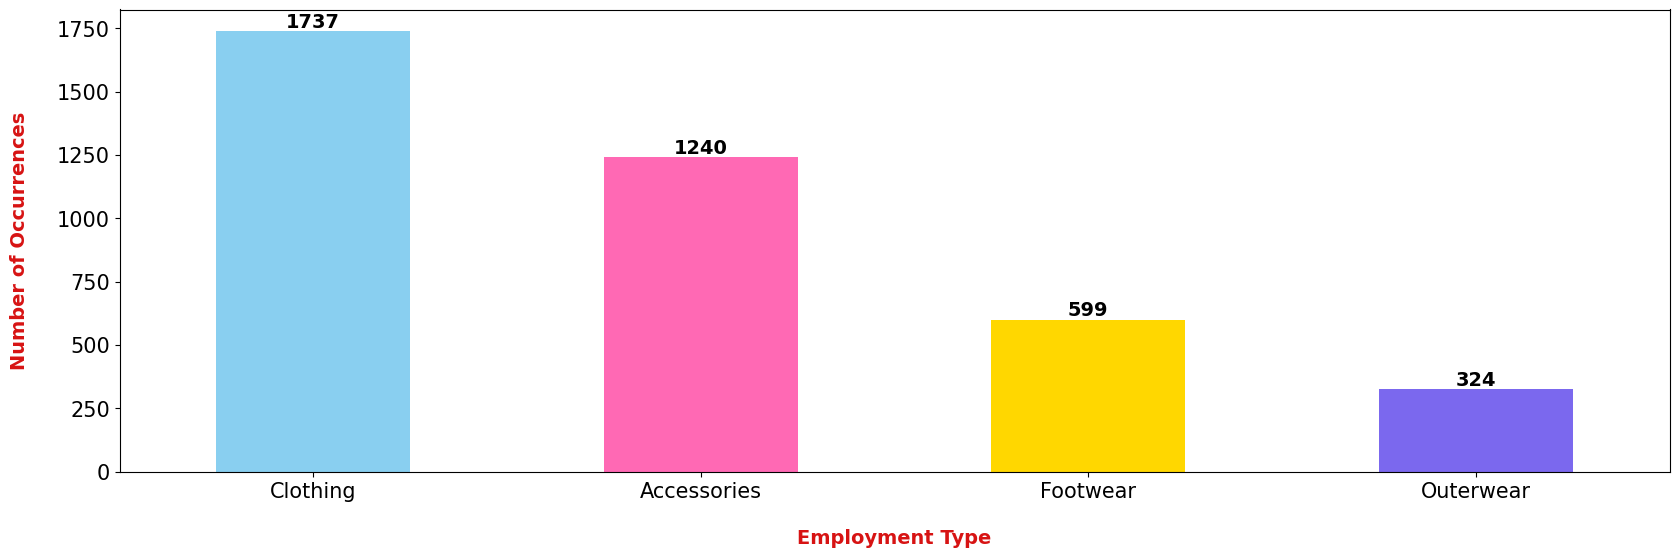

In [13]:
plt.figure(figsize = (20, 6))
ax = data["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black',fontsize=14,fontweight='bold')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

# Most Selling Items

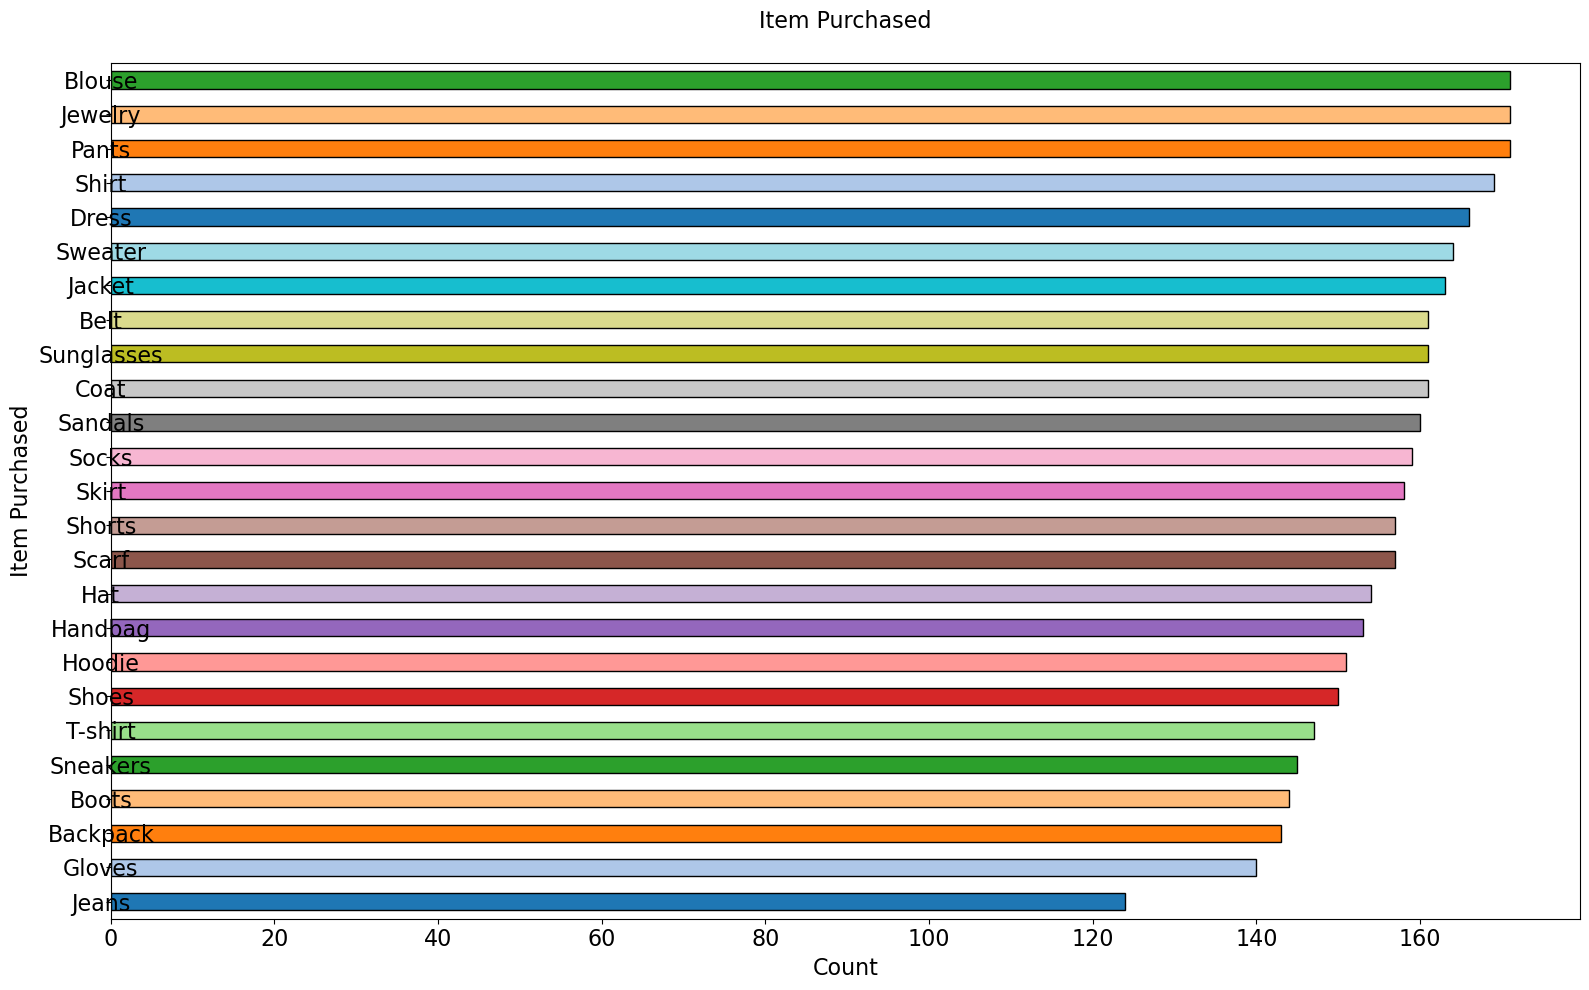

In [14]:
plt.figure(figsize = (16, 10))
data["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('Count', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks( ha = 'center', fontsize = 16)
plt.yticks( ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

# Selling Sizes Percentage

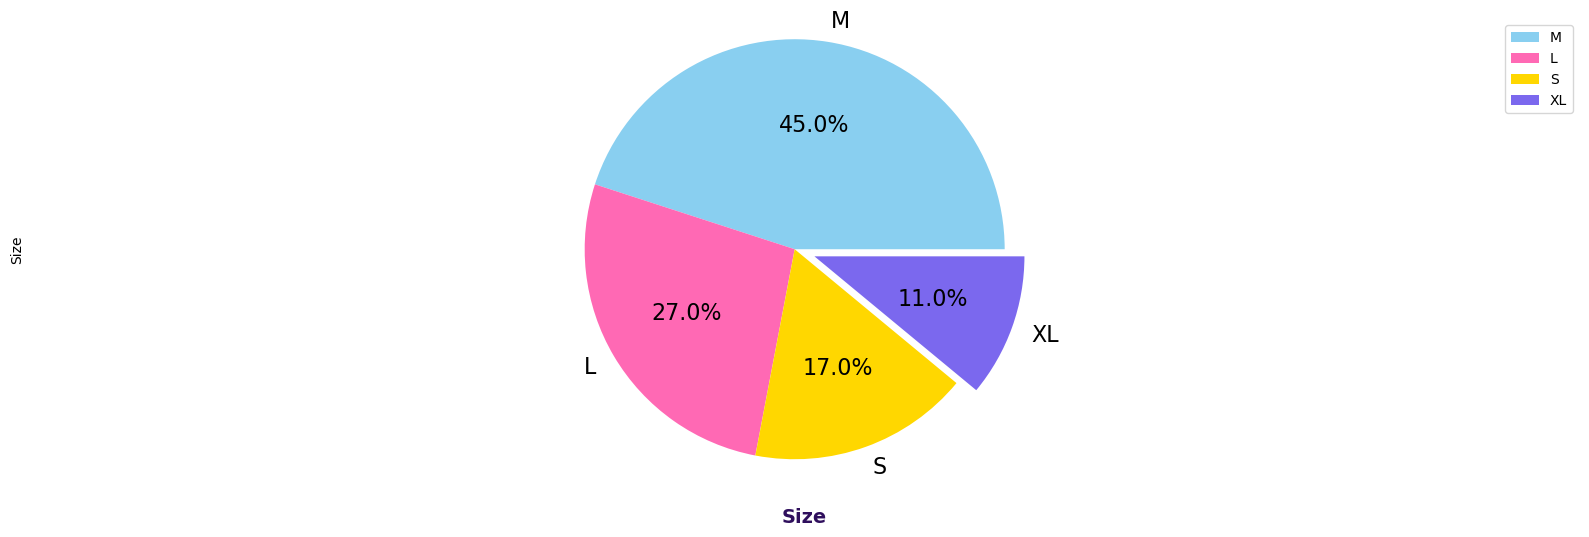

In [15]:
plt.figure(figsize = (20, 6))

counts = data["Size"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 16, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

# Purchasing Frequency

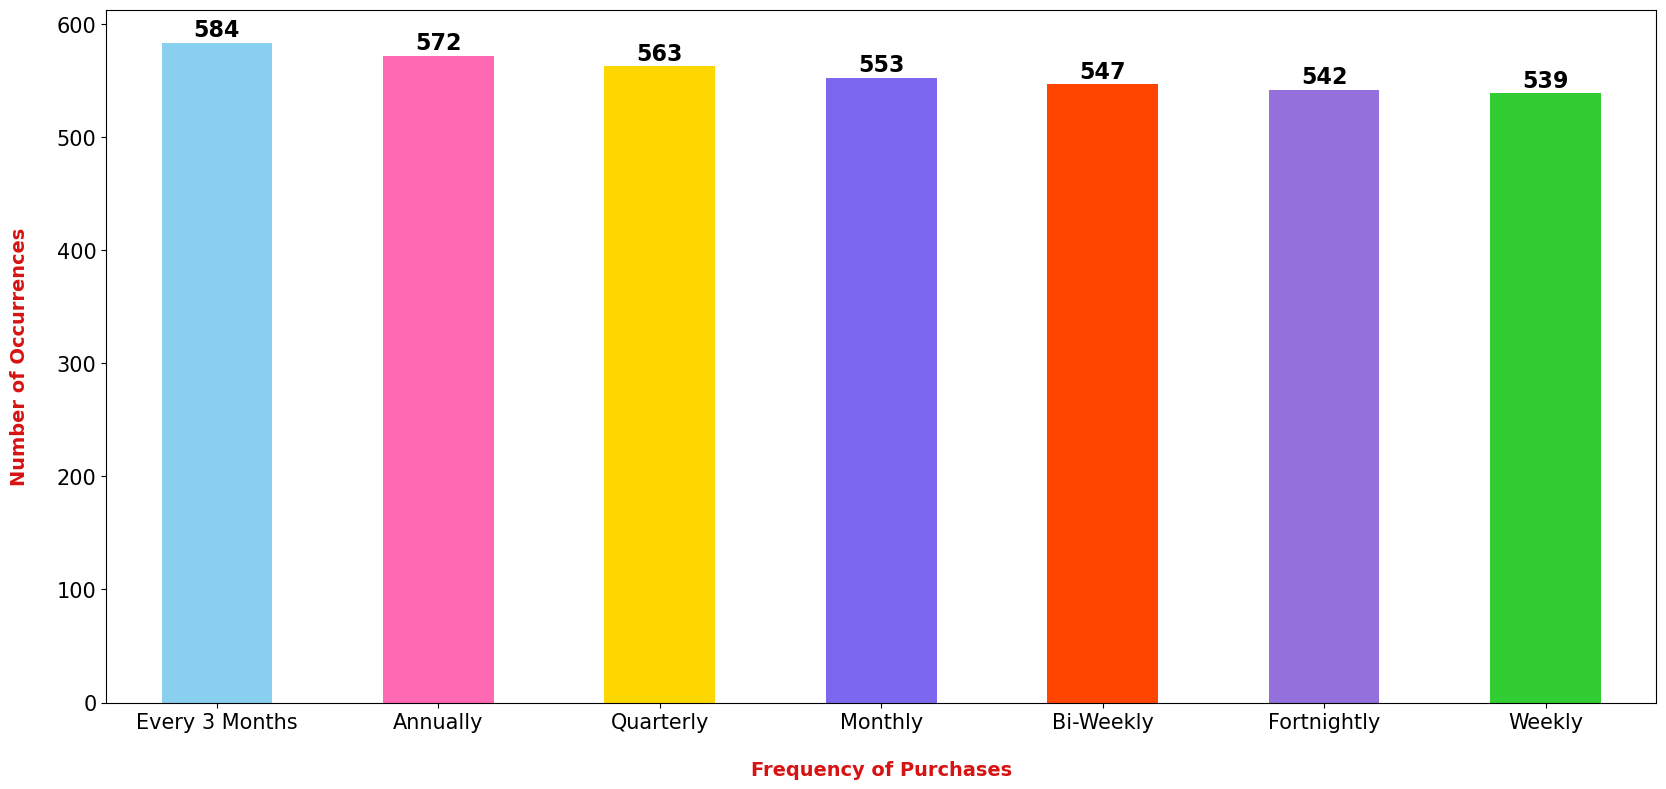

In [16]:
plt.figure(figsize = (20, 9))
ax = data["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0,fontsize=16)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black',fontsize=16,fontweight='bold')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

# total purchase amount for each category

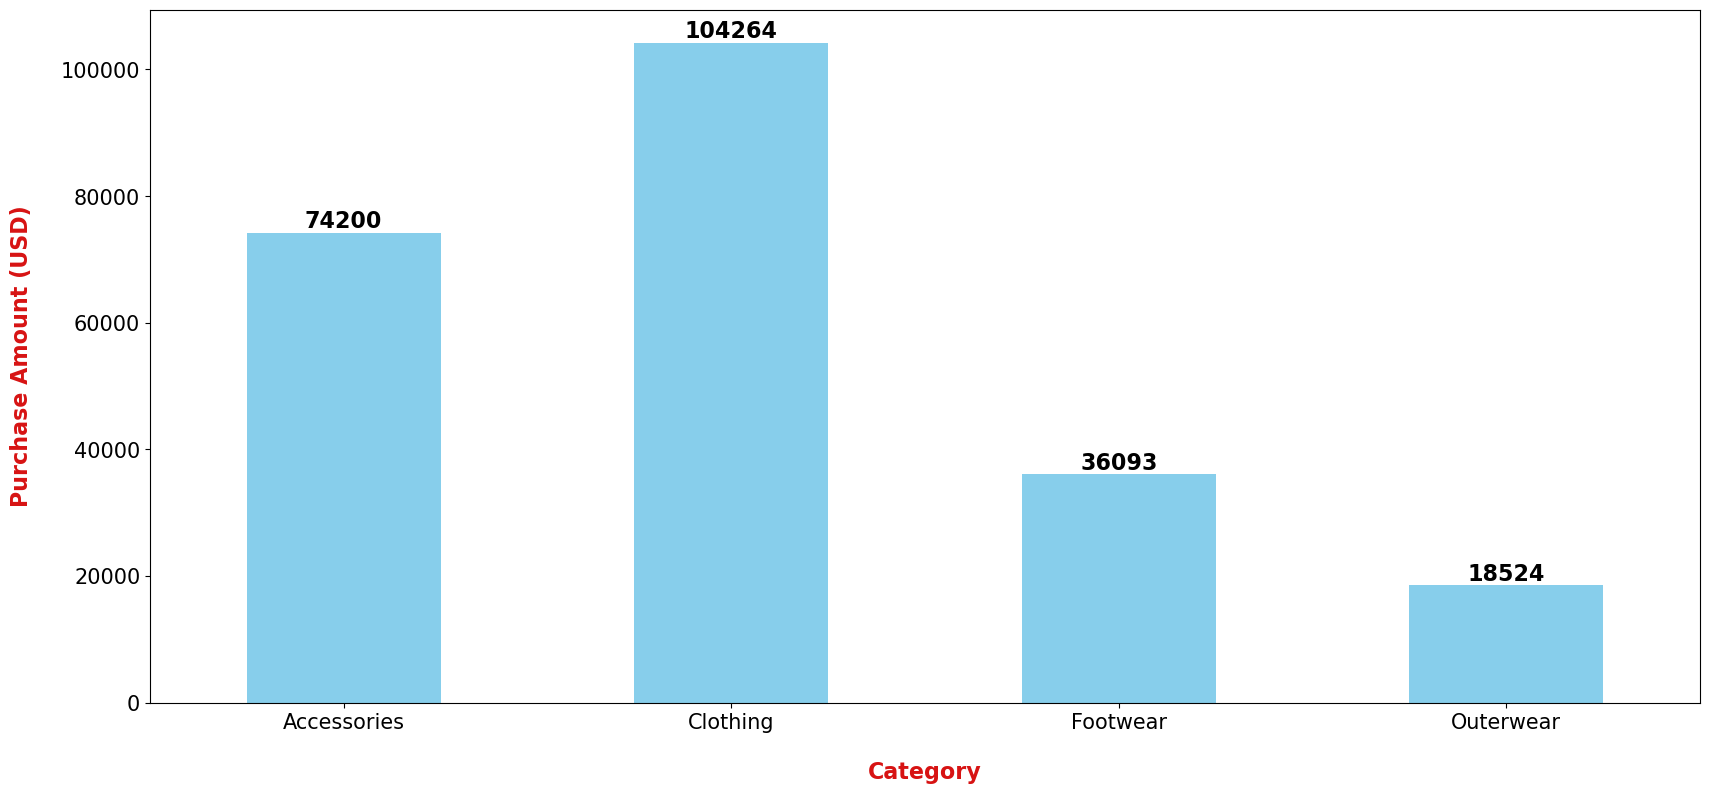

In [17]:
total_purchase_by_category = data.groupby('Category')['Purchase Amount (USD)'].sum()
plt.figure(figsize = (20, 9))
ax = total_purchase_by_category.plot(kind = 'bar', color = 'skyblue', rot = 0,fontsize=16)


for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black',fontsize=16,fontweight='bold')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Category', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20)
plt.ylabel('Purchase Amount (USD)', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20);

# Total purchase amount by gender

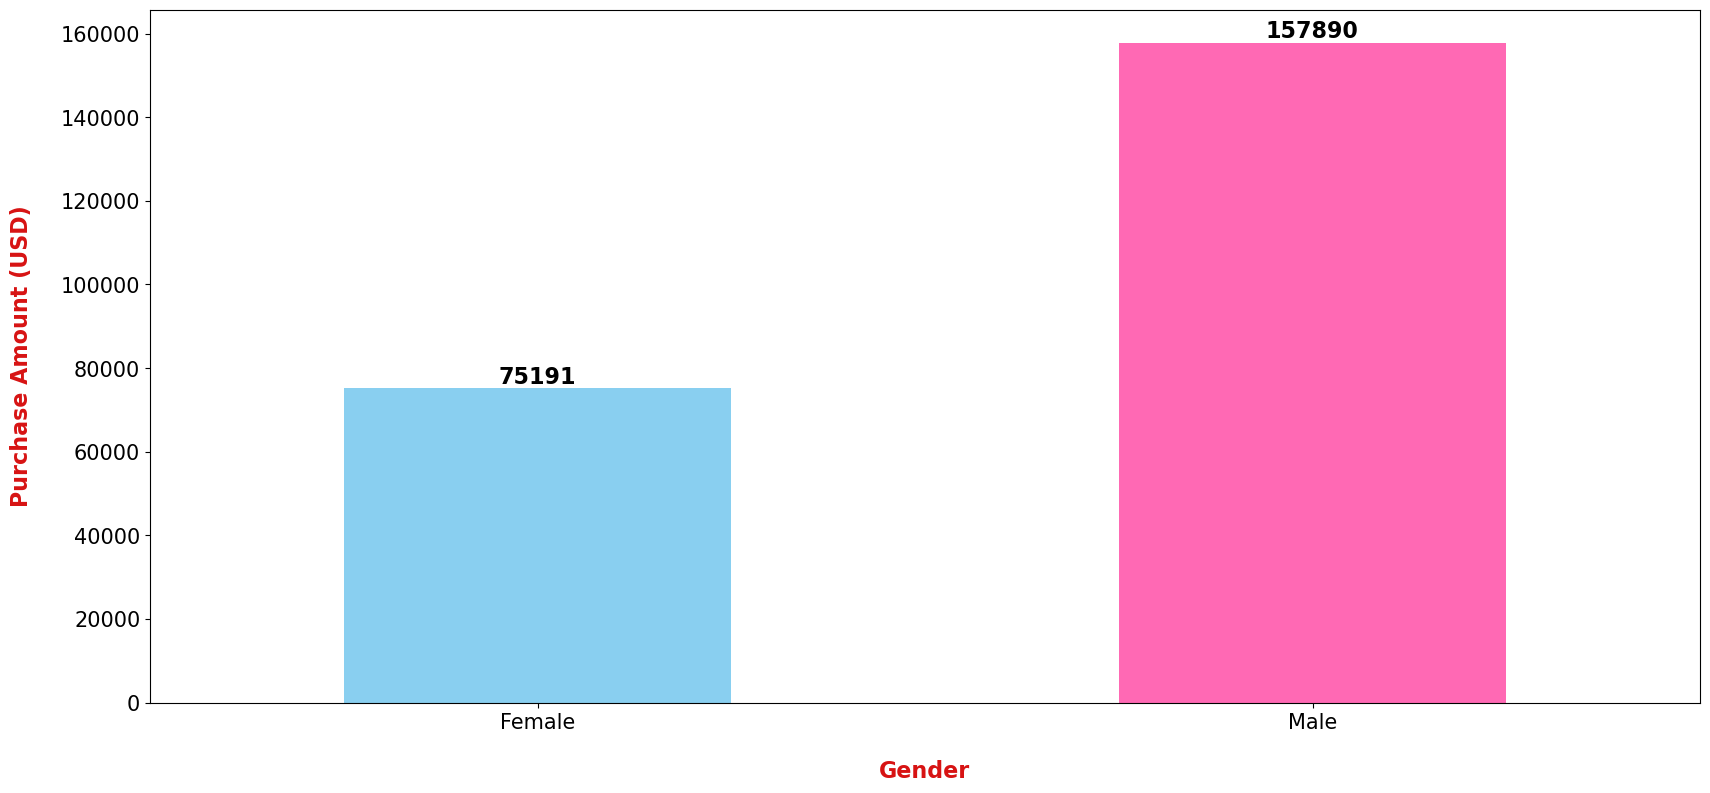

In [18]:
total_purchase_by_gender = data.groupby('Gender')['Purchase Amount (USD)'].sum()

plt.figure(figsize = (20, 9))
ax = total_purchase_by_gender.plot(kind = 'bar', color = colors, rot = 0,fontsize=16)


for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black',fontsize=16,fontweight='bold')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Gender', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20)
plt.ylabel('Purchase Amount (USD)', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20);


# Most Frequently Words used during shopping

In [19]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [20]:
data['tags'] = data['Item Purchased'] + data['Gender'] + data['Category'] + data['Location'] + data['Size']+data['Color']+data['Season']+data['Frequency of Purchases']+data['Payment Method']

In [21]:
tags = data['tags']
tags.head()

0    BlouseMaleClothingKentuckyLGrayWinterFortnight...
1    SweaterMaleClothingMaineLMaroonWinterFortnight...
2    JeansMaleClothingMassachusettsSMaroonSpringWee...
3    SandalsMaleFootwearRhode IslandMMaroonSpringWe...
4    BlouseMaleClothingOregonMTurquoiseSpringAnnual...
Name: tags, dtype: object

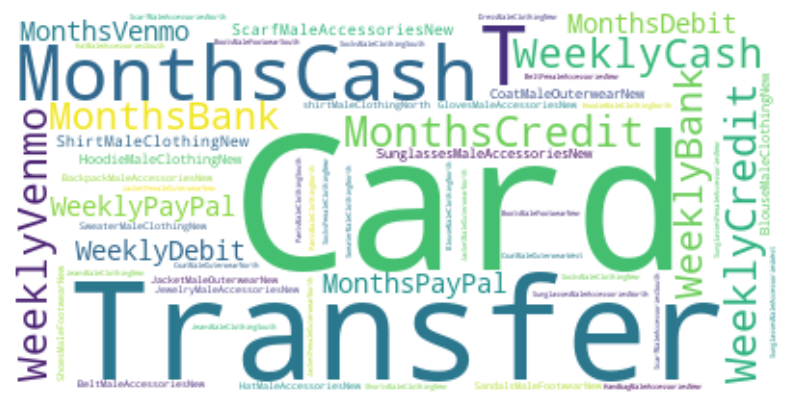

In [22]:
tags = " ".join(tags)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(tags)
plt.figure(figsize = (20, 5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")

plt.show()

# Age VS Purchase Amount

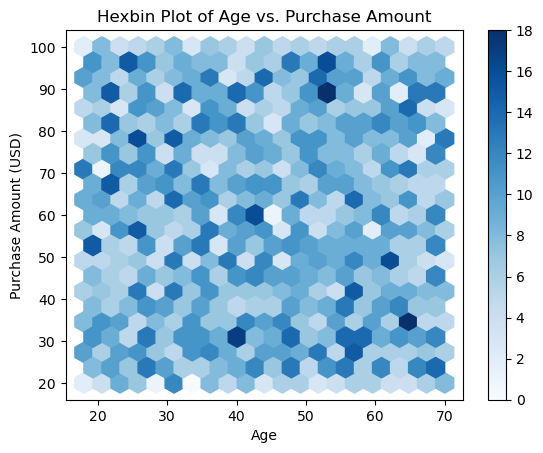

In [23]:
plt.hexbin(data['Age'], data['Purchase Amount (USD)'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.colorbar()
plt.show()

# Review Rating by Category

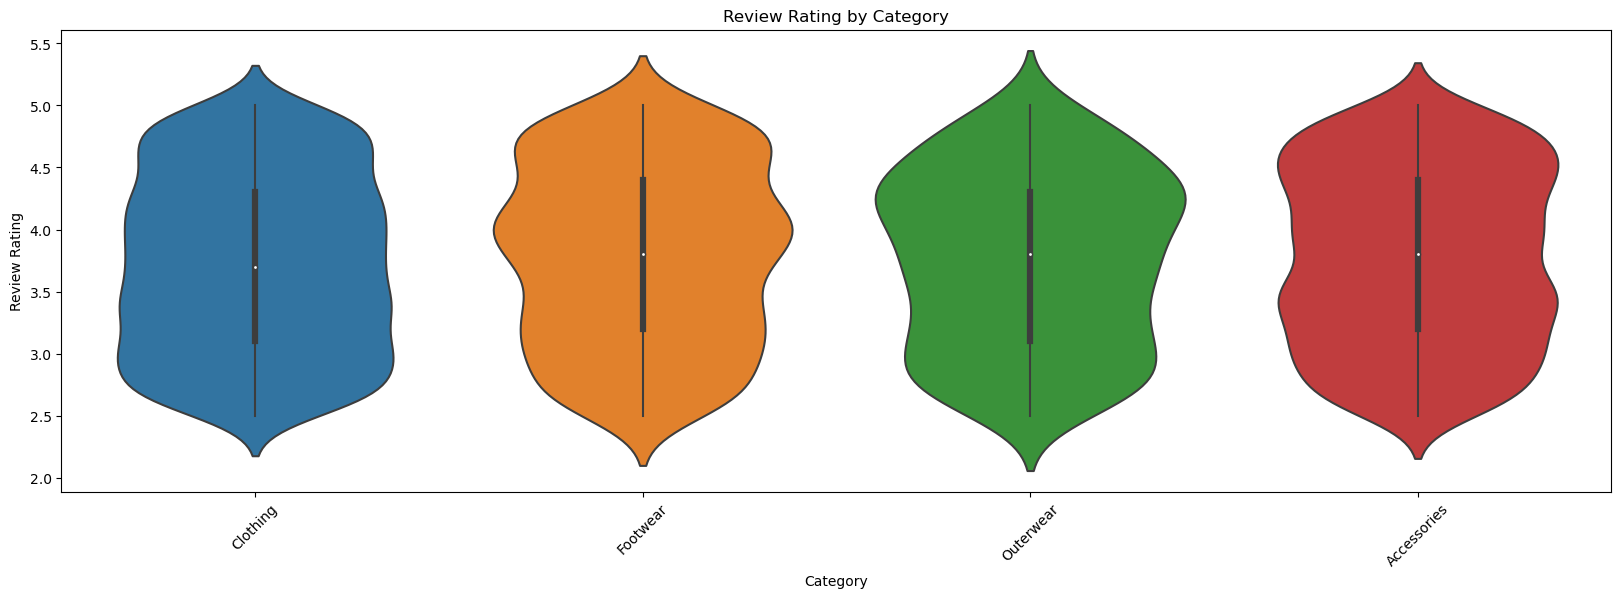

In [24]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Category', y='Review Rating', data=data)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()